In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# 1. Datasets

Train Images:  (50000, 32, 32, 3)
Train Labels:  (50000, 1)
Test  Images:  (10000, 32, 32, 3)
Test  Labels:  (10000, 1)
<Train Datasets>


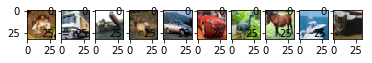

Train Labels:  [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
<Test Datasets>


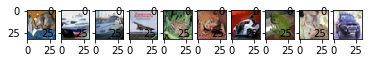

Test Labels:  [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


In [6]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print("Train Images: ", train_images.shape)
print("Train Labels: ", train_labels.shape)
print("Test  Images: ", test_images.shape)
print("Test  Labels: ", test_labels.shape)

print("="*50)
print("<Train Datasets>")
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i], 'gray')
plt.show()
print("Train Labels: ", train_labels[0:10])

print("="*50)
print("<Test Datasets>")
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i], 'gray')
plt.show()
print("Test Labels: ", test_labels[0:10])

# 2. Pre-process

In [7]:
train_images = train_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels, 10)

test_images = test_images.astype('float32') / 255.0
test_labels = to_categorical(test_labels, 10)

print("Train Images: ", train_images.shape)
print("Train Labels: ", train_labels.shape)
print("Test  Images: ", test_images.shape)
print("Test  Labels: ", test_labels.shape)

Train Images:  (50000, 32, 32, 3)
Train Labels:  (50000, 10)
Test  Images:  (10000, 32, 32, 3)
Test  Labels:  (10000, 10)


# 3. Model

In [4]:
with tf.device('/gpu:0'):
    model = Sequential()

    model.add( Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)) )
    model.add( Activation('relu') )
    model.add( Conv2D(32, (3, 3), padding='same') )
    model.add( Activation('relu') )
    model.add( MaxPool2D(pool_size=(2, 2)) )
    model.add( Dropout(rate=0.25) )

    model.add( Conv2D(64, (3, 3), padding='same') )
    model.add( Activation('relu') )
    model.add( Conv2D(64, (3, 3), padding='same') )
    model.add( Activation('relu') )
    model.add( MaxPool2D(pool_size=(2, 2)) )
    model.add( Dropout(rate=0.25) )

    model.add( Flatten() )
    model.add( Dense(512) )
    model.add( Activation('relu') )
    model.add( Dropout(rate=0.5) )
    model.add( Dense(10) )
    model.add( Activation('softmax') )


    loss_func = 'categorical_crossentropy'
    learning_rate = 0.001

    optimizer = Adam(lr=learning_rate)

    model.compile(loss=loss_func, optimizer=optimizer, metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# 4. Training

In [5]:
batch_size = 128
epochs = 10
validation_split = 0.1

history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=validation_split)

NameError: name 'train_images' is not defined

In [15]:
model.save('./save/cifar10_cnn.h5')
model = load_model('./save/cifar10_cnn.h5')

# 5. Plot Training Result

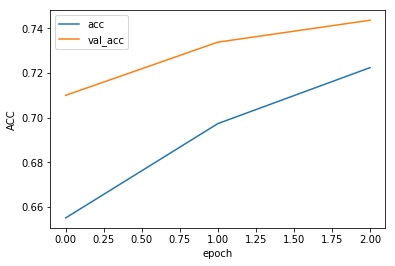

In [16]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('ACC')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

# 6. Evaluation

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('loss: {:.3f} \t acc: {:.3f}'.format(test_loss, test_acc))

10000/10000 [==============================] - 3s 334us/sample - loss: 0.7543 - acc: 0.7331
loss: 0.754 	 acc: 0.733


# 7. Prediction

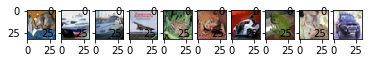

['cat', 'automobile', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'bird', 'cat', 'automobile']


In [18]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow( test_images[i] )
plt.show()

test_prediction = model.predict(test_images[0: 10])
test_prediction = np.argmax(test_prediction, axis=1)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print([labels[n] for n in test_prediction])